### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

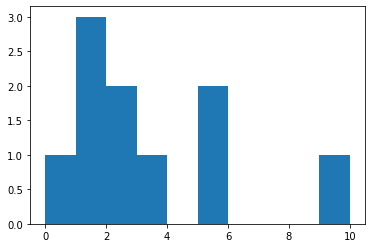

In [9]:
plt.hist(X[1])
plt.show()

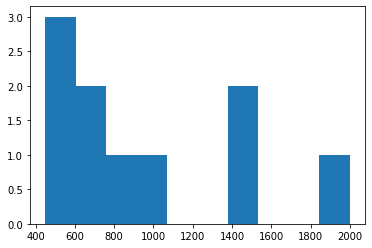

In [10]:
plt.hist(X[2])
plt.show()

In [11]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [12]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

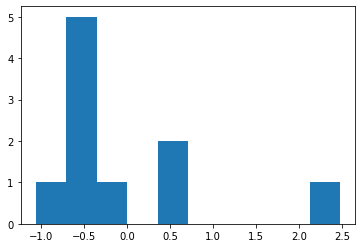

In [13]:
plt.hist(X_st[1])
plt.show()

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
X_st[2] = calc_std_fit(X[2])

In [16]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [19]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [48.88587058  4.43568698  3.60862973  4.23121521] 88.15651889725243
200 [55.49021754  5.0851645   2.8034822   4.49983224] 27.688945785290525
300 [56.3660831   5.46901723  2.16968118  4.78262838] 26.009280919216355
400 [56.48224     5.71073406  1.67527805  5.05797656] 25.60871223347337
500 [56.49764468  5.86853464  1.28458227  5.307211  ] 25.36683222718691
600 [56.49968764  5.97551569  0.97290163  5.52405287] 25.210097271946047
700 [56.49995857  6.05077463  0.7225832   5.70836089] 25.107103584439773
800 [56.49999451  6.10552978  0.52060309  5.86276657] 25.039015632192733
900 [56.49999927  6.14652595  0.35709853  5.99093067] 24.99387828212779
1000 [56.4999999   6.17793692  0.22444574  6.09667372] 24.963917205389354


array([56.4999999 ,  6.17793692,  0.22444574,  6.09667372])

In [20]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [21]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=4, alpha=1e-2)

500 [56.50790799  5.90363756  1.08461759  5.49168586] 13.081083558024403
1000 [56.51047759  6.20158506  0.14535936  6.16869334] 11.959508720892007
1500 [56.51056766  6.27458743 -0.18172521  6.43383328] 11.53048782665761
2000 [56.51060132  6.29909845 -0.29883694  6.53032   ] 11.375816437526755
2500 [56.5106135   6.30782632 -0.34093816  6.56508658] 11.32031575052416
3000 [56.51061789  6.31096148 -0.35608212  6.57759634] 11.300377371593779
3500 [56.51061946  6.31208908 -0.36152991  6.58209673] 11.293208777760736
4000 [56.51062003  6.31249471 -0.36348968  6.5837157 ] 11.290630502920738
4500 [56.51062023  6.31264063 -0.36419469  6.5842981 ] 11.289703070554262
5000 [56.51062031  6.31269312 -0.3644483   6.58450761] 11.28936944710487


array([56.51062031,  6.31269312, -0.3644483 ,  6.58450761])

L1 регуляризация

L2 регуляризация

In [22]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return np.hstack([W, err])

In [23]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-1)

500 [53.80821107  5.55425006  1.53274869  5.12255487] 32.856077085606366
1000 [53.80952378  5.70466966  1.09946397  5.42237988] 32.5901684647151
1500 [53.80952381  5.72532537  1.00880545  5.49542065] 32.54458841197802
2000 [53.80952381  5.7294535   0.98915646  5.51158348] 32.53510515825502
2500 [53.80952381  5.73034197  0.98487589  5.51511492] 32.53305784034792
3000 [53.80952381  5.73053533  0.98394268  5.51588514] 32.5326123796069
3500 [53.80952381  5.73057748  0.9837392   5.51605308] 32.53251529552861
4000 [53.80952381  5.73058667  0.98369484  5.5160897 ] 32.53249412956087
4500 [53.80952381  5.73058868  0.98368517  5.51609768] 32.53248951467818
5000 [53.80952381  5.73058911  0.98368306  5.51609942] 32.532488508464574


array([53.80952381,  5.73058911,  0.98368306,  5.51609942, 32.53248851])

In [24]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.41382962551479
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475404
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565486
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.90571241785009
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991188
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007853
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.904618882079912


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

## ДЗ

### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [25]:
w_s = []
lmb = 1e-5
for i in range(15):
    w_s.append(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lmb))
    lmb *=2
w_s = np.array(w_s)  

500 [56.49742015  5.89981731  1.04002088  5.52750782] 25.23725925553023
1000 [56.49971741  6.19554246  0.1345155   6.17185235] 24.946884474315077
1500 [56.4997175   6.26626162 -0.18017709  6.42632479] 24.91010001260788
2000 [56.4997175   6.28988752 -0.29286827  6.51906958] 24.905331877733733
2500 [56.4997175   6.29829753 -0.33339911  6.55250966] 24.904712354520164
3000 [56.4997175   6.3013197  -0.34798561  6.56454856] 24.904631435564106
3500 [56.4997175   6.30240721 -0.35323555  6.56888179] 24.90462071433125
4000 [56.4997175   6.30279862 -0.35512513  6.57044143] 24.90461923957474
4500 [56.4997175   6.30293949 -0.35580523  6.57100279] 24.90461901761902
5000 [56.4997175   6.3029902  -0.35605002  6.57120483] 24.9046189777411
500 [56.49713779  5.89977907  1.04007923  5.5274611 ] 25.23729184124907
1000 [56.49943491  6.19548392  0.1346414   6.17175588] 24.94690660969561
1500 [56.49943501  6.26619431 -0.18001176  6.42619636] 24.910110540812532
2000 [56.49943501  6.28981607 -0.29268317  6.5189

2000 [5.59273044e+01 6.15167498e+00 5.54332114e-02 6.24667260e+00] 25.265715438948813
2500 [5.59273044e+01 6.15697670e+00 2.98838020e-02 6.26775192e+00] 25.2621116658055
3000 [5.59273044e+01 6.15869608e+00 2.15853079e-02 6.27460103e+00] 25.260990809043818
3500 [5.59273044e+01 6.15925447e+00 1.88896958e-02 6.27682595e+00] 25.260631959141286
4000 [5.59273044e+01 6.15943585e+00 1.80140647e-02 6.27754869e+00] 25.260515944746253
4500 [5.59273044e+01 6.15949476e+00 1.77296280e-02 6.27778346e+00] 25.260478317395645
5000 [5.59273044e+01 6.15951390e+00 1.76372325e-02 6.27785973e+00] 25.260466100818554
500 [55.36427585  5.74974989  1.26267113  5.3474088 ] 26.666234496864234
1000 [55.36610217  5.97340891  0.59452595  5.81765632] 26.362675787483745
1500 [55.36610223  6.01603823  0.40586459  5.96999359] 26.30553478801778
2000 [55.36610223  6.02757992  0.35085873  6.01525422] 26.291225797322312
2500 [55.36610223  6.03092359  0.33474631  6.02854744] 26.287237103457393
3000 [55.36610223  6.03190213  0

In [26]:
import pylab
plt.rcParams['figure.figsize'] = (15, 7)

Text(0.5, 1.0, 'MSE')

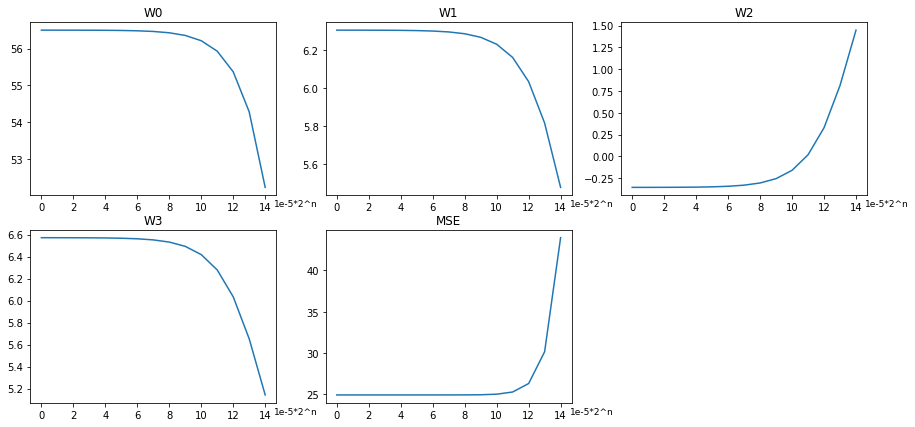

In [27]:
fig = plt.figure() 
ax1 = fig.add_subplot(231) 
ax2 = fig.add_subplot(232) 
ax3 = fig.add_subplot(233) 
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)

ax1.plot(w_s[:, 0])
ax1.set_xlabel('1e-5*2^n', fontsize = 9)
ax1.xaxis.set_label_coords(1.08, -0.025)
ax1.set_title('W0')

ax2.plot(w_s[:, 1])
ax2.set_xlabel('1e-5*2^n', fontsize = 9)
ax2.xaxis.set_label_coords(1.08, -0.025)
ax2.set_title('W1')

ax3.plot(w_s[:, 2])
ax3.set_xlabel('1e-5*2^n', fontsize = 9)
ax3.xaxis.set_label_coords(1.08, -0.025)
ax3.set_title('W2')

ax4.plot(w_s[:, 3])
ax4.set_xlabel('1e-5*2^n', fontsize = 9)
ax4.xaxis.set_label_coords(1.08, -0.025)
ax4.set_title('W3')

ax5.plot(w_s[:, 4])
ax5.set_xlabel('1e-5*2^n', fontsize = 9)
ax5.xaxis.set_label_coords(1.08, -0.025)
ax5.set_title('MSE')

## 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

теоретически можно, но будет то же самое, что и просто стандартизация. $std(\frac{x}{d})=\frac{std(x)}{d}, E(\frac{x}{d})=\frac{E(x)}{d}$

## 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [28]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [29]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mae(y, y_pred)
        err_mse = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) # производная от модуля - sign
        if i % (iterations / 10) == 0:
            print(i, W, err, err_mse)
    return W

In [32]:
np.set_printoptions(precision=5)

In [35]:
eval_model_reg1(X_st, y, iterations=2000, alpha=1e-2, lambda_=1) #.round(2)

200 [55.02381  4.829    2.22209  4.76673] 4.305377782206056 28.830099334791345
400 [55.98283  5.48779  1.2486   5.1349 ] 4.031773688422307 26.015017289669423
600 [55.9997   5.74953  0.65694  5.49064] 4.0284641465732385 25.692615815821863
800 [55.99999  5.86986  0.28062  5.76087] 4.027471157800191 25.56135763004574
1000 [5.60000e+01 5.93350e+00 3.56876e-02 5.95075e+00] 4.026539688986153 25.501840244288598
1200 [5.60000e+01 5.92560e+00 1.75708e-02 6.01562e+00] 4.027004309837574 25.47439323853193
1400 [5.60000e+01 5.91295e+00 2.99342e-03 6.02727e+00] 4.02705780789824 25.470257836141037
1600 [5.60000e+01 5.90877e+00 5.75352e-03 6.03116e+00] 4.027140970057447 25.468021080339884
1800 [5.60000e+01 5.90736e+00 7.46793e-03 6.03239e+00] 4.027214932783407 25.466664530572686
2000 [5.60000e+01 5.90694e+00 8.91634e-03 6.03284e+00] 4.027302886860296 25.46532699224304


array([5.60000e+01, 5.90694e+00, 8.91634e-03, 6.03284e+00])